# SENTIMENT ANALYSIS



In [ ]:
#Release: 1.2102.0601

## Library

For this lab, we will need ``wordcloud`` library.
Use pip to install the library from Anaconda prompt : ``pip install wordcloud``.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

from subprocess import check_output

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Read Data

In [2]:
!mkdir -p dataset
!wget https://raw.githubusercontent.com/project303/dataset/master/Twitter.csv -P dataset

--2024-02-05 18:37:02--  https://raw.githubusercontent.com/project303/dataset/master/Twitter.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 413468 (404K) [text/plain]
Saving to: ‘dataset/Twitter.csv’

Twitter.csv         100%[===================>] 403.78K  --.-KB/s    in 0.03s   

2024-02-05 18:37:02 (11.3 MB/s) - ‘dataset/Twitter.csv’ saved [413468/413468]



In [3]:
!ls dataset

Twitter.csv


Get number of dataset

In [4]:
data = pd.read_csv('dataset/Twitter.csv', sep='|')

# Choose the column we will be using
data = data[['text','sentiment']]
len(data)

4294

## Data Exploration

In [5]:
data.head(5)

,text,sentiment
0,@IndosatCare iya nomernya masih itu. Mksh.,Positif
1,@IndosatCare udah di DM yah,Positif
2,@Telkomsel aku pakai loop kak :),Positif
3,@rikawidjaya04 Terima kasih juga Kak Rika atas...,Positif
4,@ndusell saya simpati tan,Positif


In [6]:
data.groupby("sentiment").count()

,text
sentiment,
Negatif,1271
Netral,1678
Positif,1345


In [7]:
pd.set_option('display.max_colwidth', None)
data.head(5)

,text,sentiment
0,@IndosatCare iya nomernya masih itu. Mksh.,Positif
1,@IndosatCare udah di DM yah,Positif
2,@Telkomsel aku pakai loop kak :),Positif
3,@rikawidjaya04 Terima kasih juga Kak Rika atas kepercayaannya menggunakan Indosat Ooredoo. Semoga hari ini menyenangkan. Have a nice day :),Positif
4,@ndusell saya simpati tan,Positif


In [8]:
data[(data.sentiment == 'Negatif')].head(10)

,text,sentiment
940,"@indosatcare udeh berkali2 padahal min dicek mulu dari tadi , tapi tetep aje gabisa .",Negatif
941,Ada gangguan apa sama indosat ko gak bisa2 @IndosatCare,Negatif
942,@Telkomsel iPhone 5C. Saya udah uninstall dan install lagi tapi tetep aja gitu,Negatif
943,@Telkomsel tolong di cek dan di perbaiki,Negatif
944,@Telkomsel tpi mash ajj ttp kadng suka SoS MULU,Negatif
945,@Telkomsel @ jaringan dn sinyalmu lelet,Negatif
946,Pemberitahuan kayak gini gak bisa di non-aktifkan? Ganggu bgt soalnya. Gak dapet kuota midnight jg @Telkomsel https://t.co/xY4gLfhNQz,Negatif
947,@Telkomsel min knapa sih telkomsel simpati jaringan kecepatan download nya cuma 100kb lebih. biasa nya 1mb an,Negatif
948,@tsel4papua @telkomsel 3G di genyem lg gangguan kah? Lemot banget. Ato mulai di limit bandwidthnya? Karena cuma kampung?,Negatif
949,"@indosatcare cara'y pake apk indosat ooredo,pake *123# pun gk bisa,,iya masih 898",Negatif


Split Data into Training and Test Data

In [9]:
# Bagi dataset menjadi data training dan testing
train, test = train_test_split(data,test_size = 0.2)

# Hapus sentiment yang netral
train = train[train.sentiment != "Netral"]

# Pisahkan data trining positif dan negatif
train_pos = train[ train['sentiment'] == 'Positif']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negatif']
train_neg = train_neg['text']

In [10]:
train.groupby("sentiment").count()

,text
sentiment,
Negatif,1015
Positif,1059


In [11]:
train_pos

3030                                         KABAR BAHAGIA  SELAMAT   SUKSES kpd   Bondan T Sofyan sbg Eselon I Bid Ekonomi KEMENHAN RI  
3236                          Bisniscom BELA NEGARA Kodam Udayana Prioritaskan Pelajar Bukan Ormas utm source dlvr it utm medium twitter 
64                                                                                                                       @Telkomsel siapp
3210                           Berita Pelatihan Bela Negara Di Kupang Sejumlah peserta mengikuti pelatihan Bela Negara di markas komando 
3388                                                                            kemenhan udah ngamuk ngamuk  denger anak buahnya di tusuk
                                                                      ...                                                                
3304                                                                        Kemhan Nilai MNC Group Telah Melakukan Bela Negara KASKUSNews
2855                              

In [12]:
train_neg

1551                     @IndosatCare mohon informasi apakah terjadi gangguan koneksi GIG di area kalibata city? seharian tidak dapat akses internet
1120    @Telkomsel dan sekaran no telkomsel saya tdk busa tlp keluar. Sdh coba tlp ke beberapa no telkomsel lainnya bahkan XL tapi responsnya adalah
1769                       @Telkomsel ga mau ah mas leo hrga paket nya ga nahan 85rb an cm dpt 2 gb saya lbh baik selingkuh mas, hayati lelah mas 😝😄
1062      @Telkomsel ada sms paket sukses, tp g sdar blm dpt kuotanya jd pulsa utama kpake Pas sadar plsa udh 0 ?? kuota telat, msk 2 jam slanjutnya
1254                                                                          @indosat halo kaka paket 2gb nya blom masuk msh pending tolok cek plss
                                                                            ...                                                                     
3593                                                                         Menhan: Gempuran Militer Fili

Draw WordCloud

In [14]:
#augment the stopwords with nonstandard twitter words
stopwords_set = set(stopwords.words("indonesian"))
stopwords_aug = {"ya","yak","iya","yg","ga","gak","gk","udh","sdh","udah","dah","nih","ini","deh","sih","dong","donk",
                 "sm","knp","utk","yaa","tdk","gini","gitu","bgt","gt","nya","kalo","cb","jg","jgn","gw","ge",
                 "sy","min","mas","mba","mbak","pak","kak","trus","trs","bs","bisa","aja","saja","no",
                 "w","g","gua","gue","emang","emg","wkwk","dr","kau","dg","gimana","apapun","apa",
                 "klo","yah","banget","pake","terus","krn","jadi","jd","mu","ku","si","hehe",
                 "tp","pa","lu","lo","lw","tw","tau","karna","kayak","ky","lg","untuk","tuk","dg","dgn"}
stopwords_all = stopwords_set.union(stopwords_aug)

Positive words


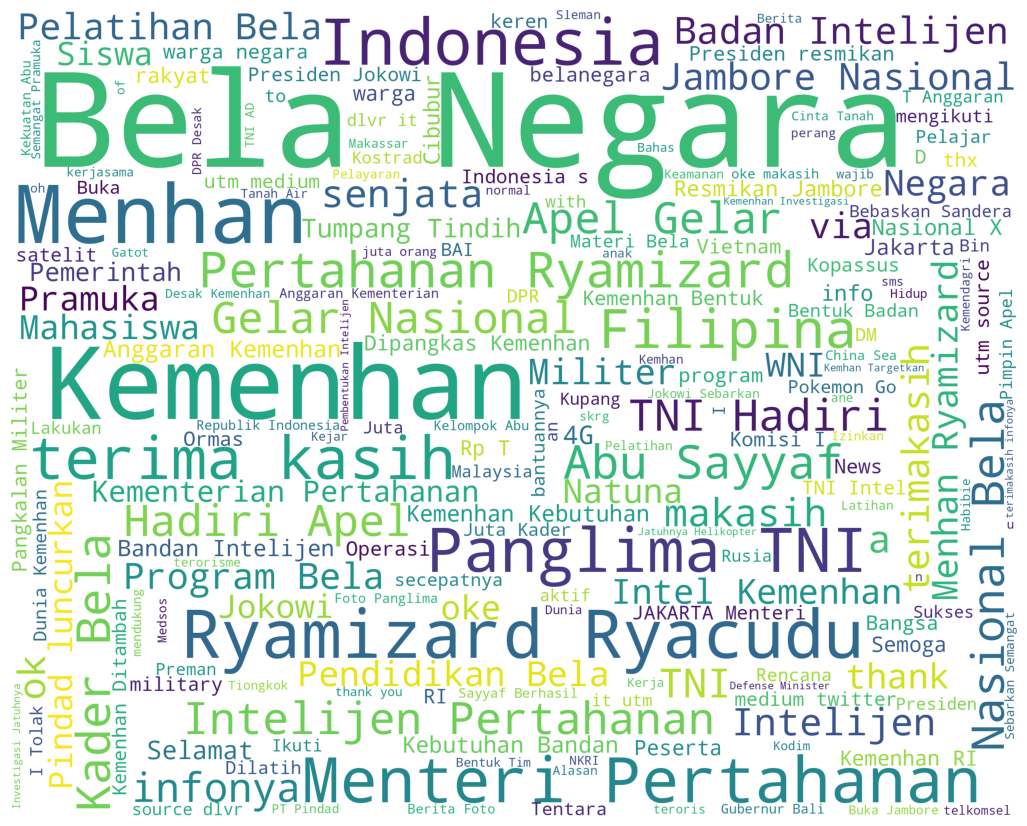

Negative words


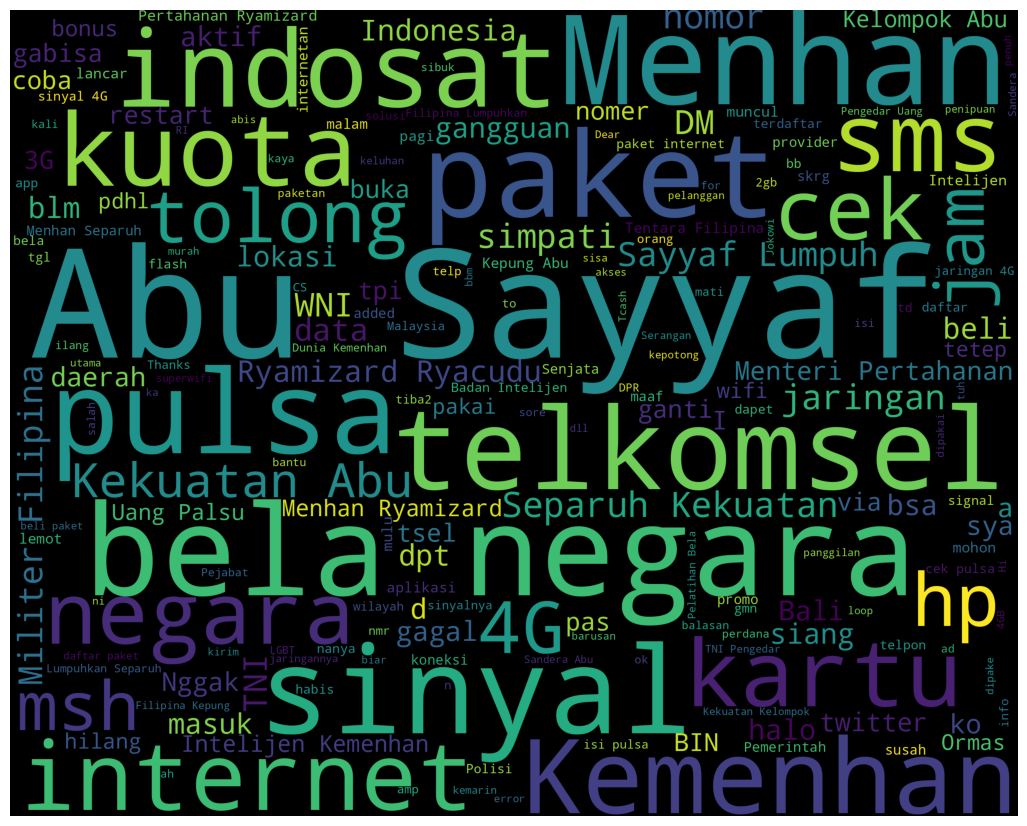

In [15]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=stopwords_all,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

## Data Preparation

In [16]:
# tweets adalah data training yang telah dibersihkan
tweets = []
#stopwords_set = set(stopwords.words("indonesia"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_all]
    tweets.append((words_cleaned,row.sentiment))

In [17]:
tweets[:5]

[(['mohon',
   'informasi',
   'apakah',
   'terjadi',
   'gangguan',
   'koneksi',
   'gig',
   'area',
   'kalibata',
   'city?',
   'seharian',
   'tidak',
   'dapat',
   'akses',
   'internet'],
  'Negatif'),
 (['dan',
   'sekaran',
   'telkomsel',
   'saya',
   'tdk',
   'busa',
   'tlp',
   'keluar.',
   'sdh',
   'coba',
   'tlp',
   'beberapa',
   'telkomsel',
   'lainnya',
   'bahkan',
   'tapi',
   'responsnya',
   'adalah'],
  'Negatif'),
 (['mau',
   'mas',
   'leo',
   'hrga',
   'paket',
   'nya',
   'nahan',
   '85rb',
   'dpt',
   'saya',
   'lbh',
   'baik',
   'selingkuh',
   'mas,',
   'hayati',
   'lelah',
   'mas'],
  'Negatif'),
 (['kabar',
   'bahagia',
   'selamat',
   'sukses',
   'kpd',
   'bondan',
   'sofyan',
   'sbg',
   'eselon',
   'bid',
   'ekonomi',
   'kemenhan'],
  'Positif'),
 (['bisniscom',
   'bela',
   'negara',
   'kodam',
   'udayana',
   'prioritaskan',
   'pelajar',
   'bukan',
   'ormas',
   'utm',
   'source',
   'dlvr',
   'utm',
   'medi

Feature Extraction

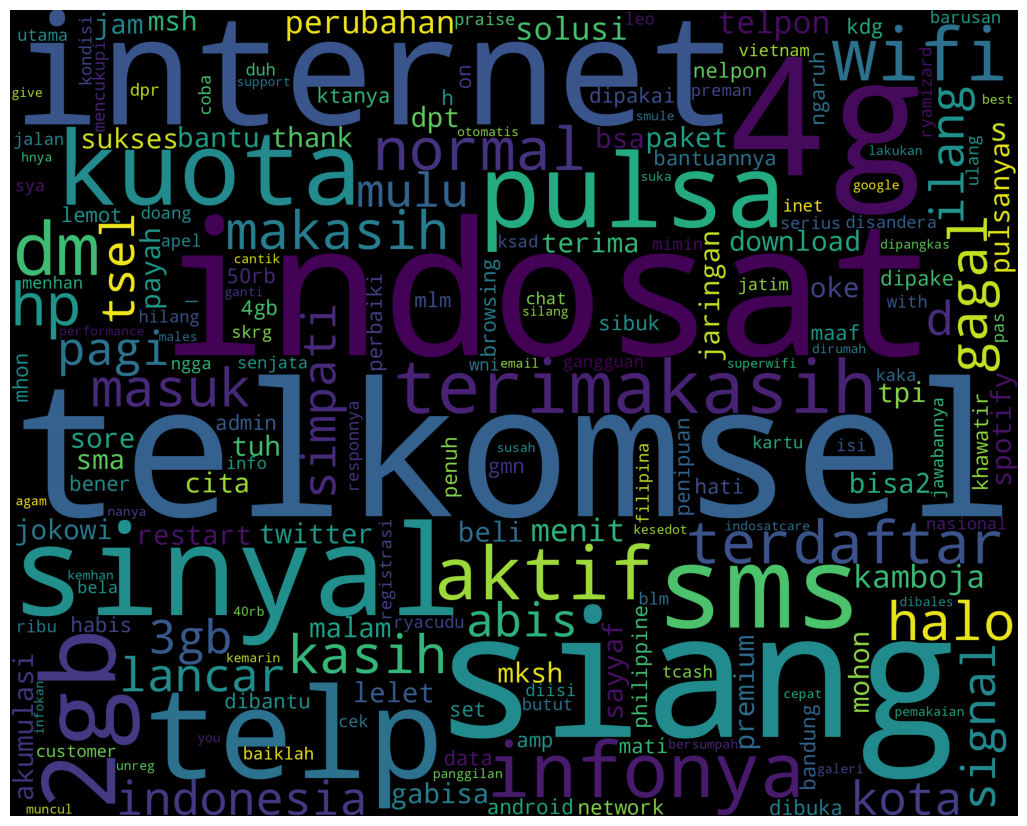

In [18]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))


def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features


wordcloud_draw(w_features)

## Train The Model

Sentiment Classification Using Naive Bayes

In [19]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [20]:
print("Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, training_set))*100)

Naive Bayes Algo accuracy percent: 92.81581485053037


## Test The Model

Test Classifier Using Test Dataset

In [21]:
test_pos = test[ test['sentiment'] == 'Positif']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negatif']
test_neg = test_neg['text']

In [22]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negatif'):
        neg_cnt = neg_cnt + 1
        #print(obj.split())
for obj in test_pos:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positif'):
        pos_cnt = pos_cnt + 1

print('[Negatif]: %s/%s '  % (len(test_neg),neg_cnt))
print('[Positif]: %s/%s '  % (len(test_pos),pos_cnt))

[Negatif]: 256/175 
[Positif]: 286/275 


In [23]:
test_pos.head()

2955                                                                                             Pejabat Kemenhan Ikut Tinjau Poskotis TMMD 
3028                                                                Berita  Kemenhan  Kebutuhan Bandan Intelijen Pertahanan Sangat Penting  
3280                                                  Terimakasih Rindam I BB pematang siantar BELA NEGARA Rindam I Bukit Barisan P Siantar 
16      @IndosatCare ok, jika kebijakan dari indosat seperti itu, mohon sosialisasi untuk pengguna yg belum suport 4G dan &amp; yg sudah 4G.
47                         @IndosatCare thank you. I had been send an email. I hope I will get a response as soon as possible .-Best Regards
Name: text, dtype: object

In [24]:
test_neg.head()

997                                                                                                      @IndosatCare dm saya belum ad kabar ya
3639                                                                                    WNI Kembali Disandera, DPR Curiga Filipina Sedang Lemah
1366    Sore @IndosatCare saya hbs ganti simcard ke yg baru sekitar jam 1 siang td, katanya ditunggu 1 jam, setelah ... https://t.co/Lo7BYtGE5d
1937        Dr latihan fisik sampe di gembleng tntng pengetahuan bela melanggar kedisiplinan awas aja yg ada rotan panjang siap kena kulit kita
1417                   @Telkomsel saya dapat sms bertubi2 dari 98000 ttg iklan download games. Mohon bantuan utk menghentikannya. Terima kasih.
Name: text, dtype: object

In [25]:
tweets_test = []
#stopwords_set = set(stopwords.words("indonesia"))

for index, row in test.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_all]
    tweets_test.append((words_cleaned,row.sentiment))

test_set = nltk.classify.apply_features(extract_features,tweets_test)

In [26]:
print("Naive Bayes Algo accuracy on test percent:", (nltk.classify.accuracy(classifier, test_set))*100)

Naive Bayes Algo accuracy on test percent: 57.50873108265425


Feature

In [27]:
w_features

dict_keys(['mohon', 'informasi', 'apakah', 'terjadi', 'gangguan', 'koneksi', 'gig', 'area', 'kalibata', 'city?', 'seharian', 'tidak', 'dapat', 'akses', 'internet', 'dan', 'sekaran', 'telkomsel', 'saya', 'tdk', 'busa', 'tlp', 'keluar.', 'sdh', 'coba', 'beberapa', 'lainnya', 'bahkan', 'tapi', 'responsnya', 'adalah', 'mau', 'mas', 'leo', 'hrga', 'paket', 'nya', 'nahan', '85rb', 'dpt', 'lbh', 'baik', 'selingkuh', 'mas,', 'hayati', 'lelah', 'kabar', 'bahagia', 'selamat', 'sukses', 'kpd', 'bondan', 'sofyan', 'sbg', 'eselon', 'bid', 'ekonomi', 'kemenhan', 'bisniscom', 'bela', 'negara', 'kodam', 'udayana', 'prioritaskan', 'pelajar', 'bukan', 'ormas', 'utm', 'source', 'dlvr', 'medium', 'twitter', 'siapp', 'ada', 'sms', 'sukses,', 'sdar', 'blm', 'kuotanya', 'pulsa', 'utama', 'kpake', 'pas', 'sadar', 'plsa', 'udh', 'kuota', 'telat,', 'msk', 'jam', 'slanjutnya', 'halo', 'kaka', '2gb', 'blom', 'masuk', 'msh', 'pending', 'tolok', 'cek', 'plss', 'berita', 'pelatihan', 'kupang', 'sejumlah', 'peserta',

In [28]:
len(w_features)

5028

In [29]:
nltk.FreqDist(get_words_in_tweets(tweets))

FreqDist({'negara': 458, 'bela': 427, 'kemenhan': 358, 'saya': 267, 'ada': 196, 'dan': 188, 'menhan': 181, 'tni': 167, 'bisa': 165, 'ini': 146, ...})

Test Classifier

In [30]:
pred =  classifier.classify(extract_features(['oke', 'nasional', 'banget', 'paket', 'pulsa']))
pred

'Negatif'

In [31]:
classifier.show_most_informative_features(20)

Most Informative Features
        containts(paket) = True           Negati : Positi =     53.2 : 1.0
       containts(sinyal) = True           Negati : Positi =     42.1 : 1.0
        containts(pulsa) = True           Negati : Positi =     27.8 : 1.0
        containts(gelar) = True           Positi : Negati =     24.6 : 1.0
     containts(nasional) = True           Positi : Negati =     15.7 : 1.0
        containts(intel) = True           Positi : Negati =     15.0 : 1.0
     containts(panglima) = True           Positi : Negati =     14.9 : 1.0
         containts(pake) = True           Negati : Positi =     14.8 : 1.0
          containts(ya?) = True           Negati : Positi =     14.4 : 1.0
        containts(empat) = True           Positi : Negati =     14.4 : 1.0
  containts(terimakasih) = True           Positi : Negati =     14.4 : 1.0
          containts(oke) = True           Positi : Negati =     13.7 : 1.0
          containts(gak) = True           Negati : Positi =     13.2 : 1.0

Data menunjukkan rasio kemunculan negatif dan positif, atau sebaliknya, untuk setiap kata. Kita dapat melihat bahwa kata "paket" muncul 53.2 kali lebih sering dalam sentimen negatif dibandingkan dalam sentimen positif.

## Save The Model

Save Classifier

In [32]:
#To save the trained claassifier, do the following
import pickle
f = open('my_classifier.pickle', 'wb')
pickle.dump(classifier, f)
f.close()

In [33]:
#To reload it:
f = open('my_classifier.pickle', 'rb')
classifier = pickle.load(f)
f.close()

In [34]:
pred = classifier.classify(extract_features(['makasih', 'sinyal', 'banget']))
pred

'Negatif'

In [36]:
extract_features(['kementerian', 'sinyal', 'banget'])

{'containts(mohon)': False,
 'containts(informasi)': False,
 'containts(apakah)': False,
 'containts(terjadi)': False,
 'containts(gangguan)': False,
 'containts(koneksi)': False,
 'containts(gig)': False,
 'containts(area)': False,
 'containts(kalibata)': False,
 'containts(city?)': False,
 'containts(seharian)': False,
 'containts(tidak)': False,
 'containts(dapat)': False,
 'containts(akses)': False,
 'containts(internet)': False,
 'containts(dan)': False,
 'containts(sekaran)': False,
 'containts(telkomsel)': False,
 'containts(saya)': False,
 'containts(tdk)': False,
 'containts(busa)': False,
 'containts(tlp)': False,
 'containts(keluar.)': False,
 'containts(sdh)': False,
 'containts(coba)': False,
 'containts(beberapa)': False,
 'containts(lainnya)': False,
 'containts(bahkan)': False,
 'containts(tapi)': False,
 'containts(responsnya)': False,
 'containts(adalah)': False,
 'containts(mau)': False,
 'containts(mas)': False,
 'containts(leo)': False,
 'containts(hrga)': False,
 